In [1]:
# ============================================
# EXPLORATORY DATA ANALYSIS (EDA)
# ============================================
# Tujuan: Memahami karakteristik data sebelum modeling
# - Melihat distribusi target variable (Churn)
# - Mengidentifikasi missing values dan data types
# - Visualisasi hubungan antar fitur dengan churn
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings untuk visualisasi
sns.set_style('whitegrid')
%matplotlib inline


In [2]:
# ============================================
# Load Dataset
# ============================================
# Dataset: Telco Customer Churn
# Sumber: IBM Sample Data Sets
# Berisi data pelanggan telekomunikasi dengan info:
# - Demografi (gender, senior citizen, partner, dependents)
# - Layanan (phone, internet, streaming, dll)
# - Akun (tenure, contract, payment method, charges)
# - Target: Churn (Yes/No)

df = pd.read_csv(r'D:\churn-app\data\raw\TelcoCustomerChurn.csv')

# Quick overview
print(f"Shape: {df.shape}")  # (rows, columns)
print(f"\nColumns:\n{df.columns.tolist()}")
print(f"\nChurn distribution:\n{df['Churn'].value_counts()}")
print(f"\nChurn rate: {df['Churn'].value_counts(normalize=True)['Yes']:.2%}")

df.head()


Shape: (7043, 21)

Columns:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Churn distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn rate: 26.54%


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# ============================================
# Cek Data Types & Missing Values
# ============================================
# Penting untuk:
# - Identifikasi kolom yang perlu di-convert (TotalCharges harusnya numeric)
# - Cek apakah ada missing values yang perlu di-handle

print(df.info())
print("\n" + "="*50)
print("Missing values:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# ============================================
# Statistik Deskriptif
# ============================================
# Melihat distribusi numerical features:
# - SeniorCitizen: binary (0/1), ~16% senior
# - tenure: 0-72 bulan, median 29 bulan
# - MonthlyCharges: $18-$118, median $70

df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


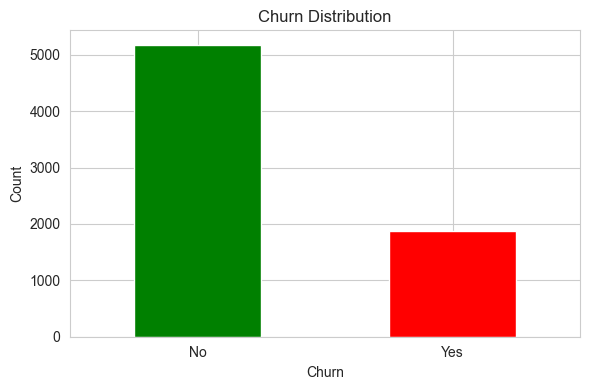

In [5]:
# ============================================
# Visualisasi: Distribusi Churn
# ============================================
# Dataset imbalanced: ~73% No Churn, ~27% Churn
# Ini penting untuk modeling - perlu handle class imbalance

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
sns.countplot(data=df, x='Churn', ax=axes[0], palette=['#2ecc71', '#e74c3c'])
axes[0].set_title('Churn Distribution (Count)', fontsize=14)
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')

# Percentage pie chart
churn_counts = df['Churn'].value_counts()
axes[1].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', 
            colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Churn Distribution (%)', fontsize=14)

plt.tight_layout()
plt.savefig('../outputs/figures/churn_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nChurn Rate: {df['Churn'].value_counts(normalize=True)['Yes']:.2%}")


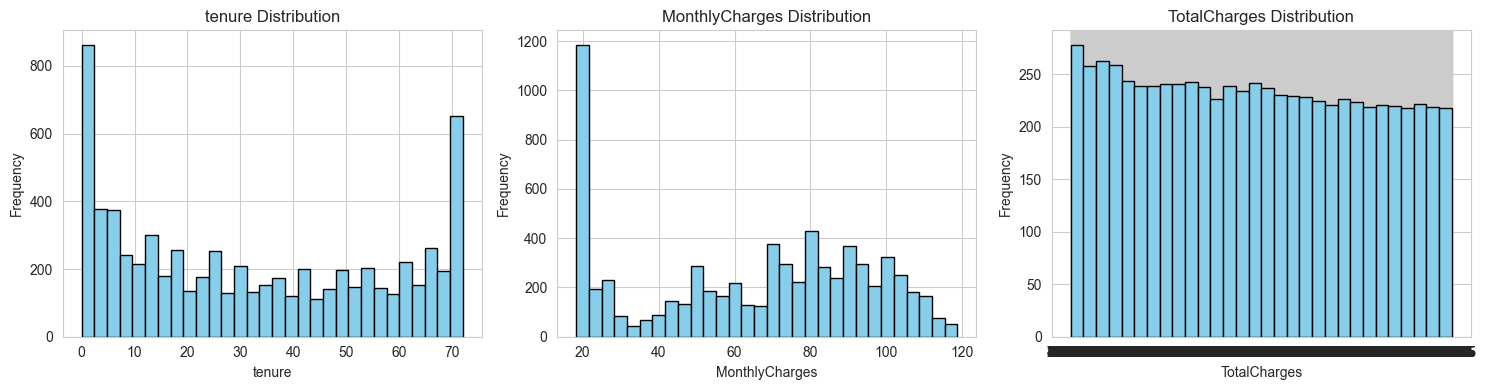

In [6]:
# Numerical Features distribution
numerical_cols = ["tenure", "MonthlyCharges","TotalCharges"]
fig, axes = plt.subplots(1, 3, figsize=(15,4))
for i ,col  in enumerate(numerical_cols):
    axes[i].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('../outputs/figures/numerical_distributions.png', dpi=150)
plt.show()

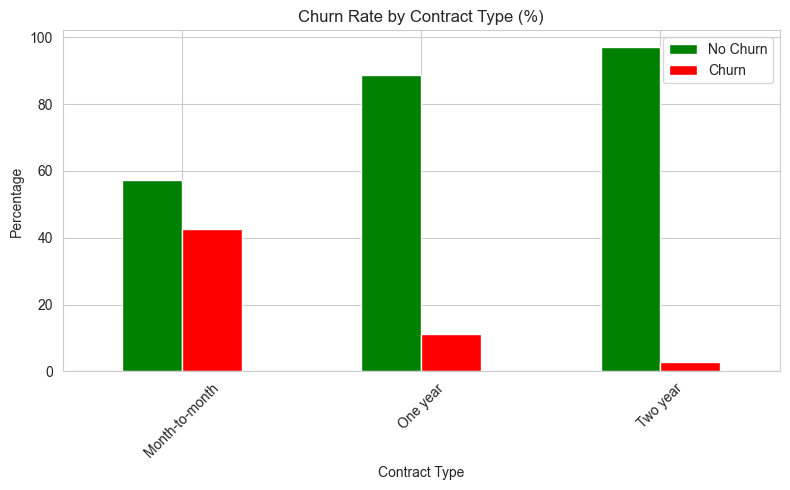


Churn rate by contract:
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


In [7]:
# Churn by Contract Type
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

contract_churn.plot(kind='bar', figsize=(8, 5), color=['green', 'red'])
plt.title('Churn Rate by Contract Type (%)')
plt.xlabel('Contract Type')
plt.ylabel('Percentage')
plt.legend(['No Churn', 'Churn'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../outputs/figures/churn_by_contract.png', dpi=150)
plt.show()

print("\nChurn rate by contract:")
print(contract_churn)